In [29]:
#머신러닝모델
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
import io
 
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
 
from google.colab import drive
 
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
 
 
data = dt.to_numpy()
target = tr.to_numpy()
 
 
train_input, test_input, train_target, test_target = train_test_split(data, target)
 
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
 
poly = PolynomialFeatures(degree = 1)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
 
 
ss = StandardScaler()
ss.fit(train_poly)
train_scaled =ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
 
from sklearn.linear_model import Ridge
  #ridge = Ridge()
  #ridge.fit(train_scaled, train_target)
 
  #print(ridge.score(train_scaled, train_target))
  #print(ridge.score(test_scaled, test_target))
 
 
params = {'alpha': randint(0.001, 1),
          }
 
 
gs = RandomizedSearchCV(Ridge(), params, n_iter = 100, n_jobs=-1)
gs.fit(train_scaled, train_target)
 
dt = gs.best_estimator_
 
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
 
val = ss.transform(poly.transform([[1454,1451,1252,1278,1784,1838,1630,3]]))
 
print(dt.predict(val)/7)
 
#Data.close
#Target.close

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0.9610584743302023
0.9310423568466791
[[1734.59166903]]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 8)                 0         
_________________________________________________________________
batch_normalization_63 (Batc (None, 8)                 32        
_________________________________________________________________
dense_63 (Dense)             (None, 64)                576       
_________________________________________________________________
batch_normalization_64 (Batc (None, 64)                256       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_65 (Batc (None, 64)                2

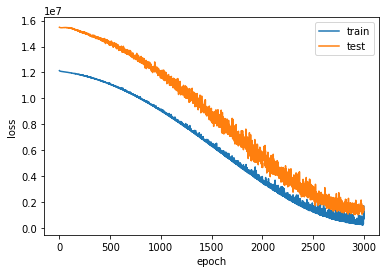

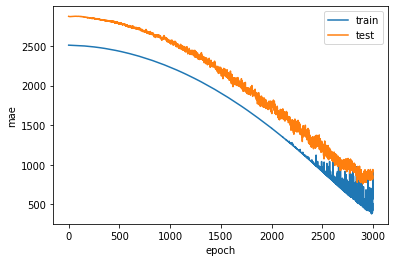

In [28]:
#딥러닝 시작하자#일주일단위
!pip install pandas
!pip install requests
!pip install scikit-learn
 
import keras
import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
 
def Model_Build(a_layer = None):
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model
 
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
train_input, test_input, train_target, test_target = train_test_split(data, target)
 
 
 
Model = Model_Build(keras.layers.Dropout(0.2))
Model.summary()
history = Model.fit(train_input, train_target, epochs=3000, verbose=0, validation_data=(test_input, test_target))
 
print(Model.predict([[1454,1451,1252,1278,1784,1838,1630,3]])/7)
 
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()
 
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#딥러닝 시작하자#하루단위
!pip install pandas
!pip install requests
!pip install scikit-learn
 
import keras
import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import requests
import re
import os
from google.colab import drive
from keras import models
from keras import layers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
 
 
def Model_Build():
  Model = models.Sequential()
  Model.add(layers.Flatten(input_shape=(train_input.shape[1],)))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(64, activation = 'tanh'))
  Model.add(BatchNormalization())
 
  Model.add(layers.Dense(1))
  Model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return Model
 
drive.mount('/content/drive')
 
dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_WITHOUTRESTRICTION.csv")
dt.head()
 
 
tr = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/WEEKLY_TARGET.csv")
tr.head()
 
data = dt.to_numpy()
target = tr.to_numpy()
 
train_input, test_input, train_target, test_target = train_test_split(data, target)
 
 
Model = Model_Build()
Model.summary()
history = Model.fit(train_input, train_target, epochs=3000, verbose=0, validation_data=(test_input, test_target))
 
print(Model.predict([[1454,1451,1252,1278,1784,1838,1630,3]])/7)
 
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()
 
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
#키워드 분류 일주일단위
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow
 
import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive
 
 
def File_Access(File_To_Write, poslist, neglist, path, file_name,temp,count,vals):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
 
  print(sum)
 
  if(count == 7):
    sum+=vals
    if temp == 0:
      File_To_Write.write(str(sum)+"\n")
    else:
      File_To_Write.write(str(sum))
  
  return sum
 
def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False
 
    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1
 
    label_lists.append(temp_label)
  
  return label_lists
    
 
 
drive.mount('/content/drive')
 
path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)
 
#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')
 
while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')
 
while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break
 
c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)
 
count = 0
vals = 0
 
for file in file_list:
  temp = 0
  count+=1
  if file is file_list[-1]:
    temp = 1
  
  vals += File_Access(f, poslist, neglist, path, file,temp,count, vals)
 
  if(count == 7):
    count = 0
    vals = 0
f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

In [ ]:
#키워드 분류 Daily
!pip install pandas
!pip install requests
#!pip install kreas
!pip install scikit-learn
!pip install tensorflow

import codecs
import io
from tqdm import tqdm
from sklearn.model_selection import train_test_split
#from tensorflow import kreas
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import requests
import re
#from tensorflow import kreas
import os
from google.colab import drive


def File_Access(File_To_Write, poslist, neglist, path, file_name,temp):
  c = path + "/" + file_name
  
  news_labels = pd.read_csv(c)
  news_labels.head()
  news_labels.to_numpy()
  sum = 0
  for member in Tag_Search(poslist, neglist, news_labels):
    sum += member
  if temp == 0:
      File_To_Write.write(str(sum)+"\n")
  else:
      File_To_Write.write(str(sum))
  
  return sum

def Tag_Search(poslist, neglist, lists):
  label_lists = []
  for names in lists:
    temp_label = 0
    sub_names = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》]', '', names)
    is_positive = False
    is_negative = False

    for positive_words in poslist:
      if sub_names.find(positive_words) == 1:
        is_positive = True
        break
    for negative_words in neglist:
      if sub_names.find(negative_words) == 1:
        is_negative = True
        break
    
    if (is_positive == False and is_negative == False):
      temp_label = 0
    if is_positive == True:
      temp_label = 1
    elif is_negative == True:
      temp_label = -1

    label_lists.append(temp_label)
  
  return label_lists
    


drive.mount('/content/drive')

path = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA"
file_list = os.listdir(path)

#긍정부정 라벨링
poslist = []
neglist = []
#긍정 단어들
positive = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/positive.csv", 'rb', encoding='UTF-8')

while True:
  ln = positive.readline()
  ln = ln.replace('\n','')
  poslist.append(ln)
  if not ln: break
#부정 단어들
neagative = codecs.open("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Keywords/negative.csv", 'rb', encoding='UTF-8')

while True:
  ln = neagative.readline()
  ln = ln.replace('\n','')
  neglist.append(ln)
  if not ln: break

c = "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/Crwal_Label/LABEL_DATA_DAILY.csv"
  
f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)


for file in file_list:
  temp = 0
  if file is file_list[-1]:
    temp = 1
  
  File_Access(f, poslist, neglist, path, file,temp)

f.close()
#dt = pd.read_csv("/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CSV_DATA/COVID_ADDED.csv")
#dt.head()

 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#크롤링
!pip install Selenium
!pip install requests
!apt-get update # to update ubuntu to correctly run apt install

!apt install chromium-chromedriver

from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import requests

chrome_options = webdriver.ChromeOptions()

chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정

chrome_options.add_argument('--no-sandbox')

chrome_options.add_argument('--disable-dev-shm-usage')


def Crwal_Data(Year, Month, Day):
  lists = []
  for i in range(0, 30):
    Call_Vals(Year, Month, Day, i*10+1, lists)

  print(lists)
  return lists

def Call_Vals(Year, Month, Day, n, lists):
  c = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%BD%94%EB%A1%9C%EB%82%98&sort=0&photo=0&field=0&pd=3&ds=' + str(Year) + '.' + str(Month) + '.' + Day+ '&de=' + str(Year) + '.' + str(Month) + '.' + str(Day)+ '&cluster_rank=48&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:from'+ str(Year) + str(Month) + str(Day) +'to'+ str(Year) + str(Month) + str(Day) +',a:all&start='+str(n)
  # 특정 URL에 접속하는 요청(Request) 객체를 생성
  request = requests.get(c)
  # 접속한 이후의 웹 사이트 소스코드를 추출합니다.
  html = request.text
  # HTML 소스코드를 파이썬 BeatifulSoup 객체로 변환합니다.
  soup = BeautifulSoup(html, 'html.parser')

  # select 과정
  links = soup.select('#main_pack > section.sc_new.sp_nnews._prs_nws > div > div.group_news > ul.list_news')

  for article in links:
    a_tag = article.select('div.news_wrap.api_ani_send > div.news_area > a')
    for temp_tag in a_tag:
      lists.append(temp_tag['title'])
  
def Write_File(Year, Month, Day, File_Pos):
  c = File_Pos + str(Year) + str(Month) + Day+".txt"
  
  f = open(c, 'w')#r:읽기모드 w:쓰기모드 a:추가모드(끝에추가)#새파일생성할거임매일
  lists = Crwal_Data(str(Year), str(Month), Day)
  f.write(','.join(lists))
  #print(f.read())
  f.close()
"""
for Day in range(21, 29) :
  Write_File('2020', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 30) :
  Write_File('2020', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")


Write_File('2020', '02', '29', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '03', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '04', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '05', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '06', '30', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
Write_File('2020', '07', '31', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""
"""
for Day in range(19, 32) :
  Write_File('2020', '08', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '09', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '10', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2020', '11', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2020', '12', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '01', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(28, 29) :
  Write_File('2021', '02', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '03', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '04', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 32) :
  Write_File('2021', '05', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 31) :
  Write_File('2021', '06', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

for Day in range(1, 28) :
  Write_File('2021', '07', str(Day).zfill(2), "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

#Write_File('2021', '07', '07', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")
"""

Write_File('2021', '07', '29', "/content/drive/MyDrive/COVID_19_PREDICTION/DATASET/CRWAL_DATA/")

Exception ignored in: <function _get_module_lock.<locals>.cb at 0x7fecb45b9dd0>
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 177, in cb
KeyboardInterrupt: 
     |████████████████████████████████| 904 kB 5.3 MB/s 
ERROR: Operation cancelled by user
^C
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 69, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/__init__.py", line 91, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.7/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1006, in _gcd_import
  File "<frozen importlib._bootstrap>", line 983, in _find_and_load
  File "<frozen importli